# Neural Network Classifier for Sentiment Analysis of Conversations

In [1]:
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
import numpy as np
import librosa
import os
import tensorflow as tf
from sklearn import preprocessing
from Audio_Preprocess import *

In [2]:
# Load data
npz = np.load('Sentiment_analysis_data.npz')
x = npz['inputs']
y = npz['targets']

In [3]:
# Standarise data
scaled_x = preprocessing.scale(x)

In [4]:
# Shuffle data
n = x.shape[0]
shuffled_indices = np.arange(n)
np.random.shuffle(shuffled_indices)

shuffled_x = scaled_x[shuffled_indices]
shuffled_y = y[shuffled_indices]

In [5]:
# One hot enconding for labels
labels_y, onehot_y = np.unique(shuffled_y, return_inverse=True)
# shuffled_y, labels_y, onehot_y

In [6]:
onehot_y

array([0, 1, 4, ..., 3, 4, 4])

In [7]:
# Generate training and testing sets

ratio = 0.75

n_train = int(n*0.75)

x_train = shuffled_x[:n_train]
y_train = onehot_y[:n_train]

x_test = shuffled_x[n_train:]
y_test = onehot_y[n_train:]

In [8]:
# Generate training and testing sets

ratios = [0.8, 0.1, 0.1]

n_train = int(n*ratios[0])
n_test = int(n*ratios[1])

x_train = shuffled_x[:n_train]
y_train = onehot_y[:n_train]

x_test = shuffled_x[n_train:n_train+n_test]
y_test = onehot_y[n_train:n_train+n_test]

x_val = shuffled_x[n_train+n_test:]
y_val = onehot_y[n_train+n_test:]

In [9]:
# Create NN model

hidden_layer_1_size = 50
hidden_layer_2_size = 50
output_size = labels_y.shape[0]

model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(x_test.shape[0], x_test.shape[1])),
    tf.keras.layers.Dense(hidden_layer_1_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_1_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Check inputs shape
x_train.shape, y_train.shape

((2228, 28), (2228,))

In [11]:
# Train model

batch_size = 30
max_epochs = 20

history = model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=max_epochs,
          validation_data=(x_val, y_val),
          verbose=2
          )

Epoch 1/20
75/75 - 1s - loss: 1.4907 - accuracy: 0.5085 - val_loss: 0.8970 - val_accuracy: 0.8250
Epoch 2/20
75/75 - 1s - loss: 0.5992 - accuracy: 0.8662 - val_loss: 0.3544 - val_accuracy: 0.9214
Epoch 3/20
75/75 - 1s - loss: 0.2806 - accuracy: 0.9259 - val_loss: 0.2105 - val_accuracy: 0.9500
Epoch 4/20
75/75 - 1s - loss: 0.1805 - accuracy: 0.9506 - val_loss: 0.1676 - val_accuracy: 0.9536
Epoch 5/20
75/75 - 1s - loss: 0.1356 - accuracy: 0.9627 - val_loss: 0.1473 - val_accuracy: 0.9607
Epoch 6/20
75/75 - 1s - loss: 0.1075 - accuracy: 0.9722 - val_loss: 0.1318 - val_accuracy: 0.9571
Epoch 7/20
75/75 - 1s - loss: 0.0873 - accuracy: 0.9767 - val_loss: 0.1429 - val_accuracy: 0.9536
Epoch 8/20
75/75 - 1s - loss: 0.0754 - accuracy: 0.9780 - val_loss: 0.1147 - val_accuracy: 0.9571
Epoch 9/20
75/75 - 1s - loss: 0.0647 - accuracy: 0.9816 - val_loss: 0.1132 - val_accuracy: 0.9571
Epoch 10/20
75/75 - 1s - loss: 0.0540 - accuracy: 0.9847 - val_loss: 0.0972 - val_accuracy: 0.9714
Epoch 11/20
75/75 -

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1450      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 357       
Total params: 4,357
Trainable params: 4,357
Non-trainable params: 0
_________________________________________________________________


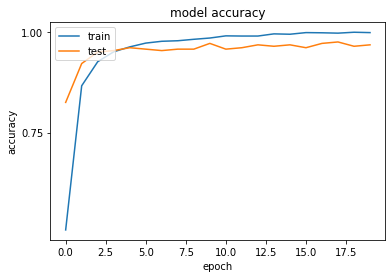

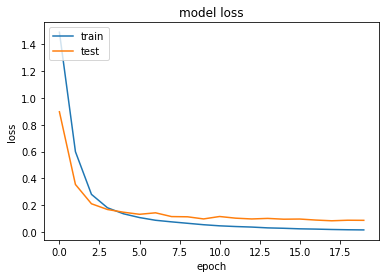

In [13]:
# History for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.yticks([0.75, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# History for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Evaluate model

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

9/9 [==============================] - 0s 5ms/step - loss: 0.1258 - accuracy: 0.9820

Test loss: 0.13. Test accuracy: 98.20%


In [15]:
y_test_pred = model.predict(x_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

In [16]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_test_pred)

In [17]:
def plot_confusion_matrix(cm, classes,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

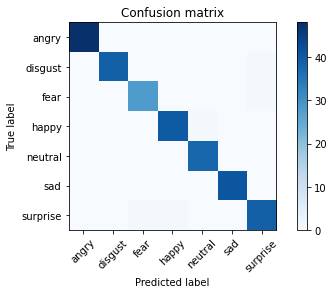

In [18]:
plot_confusion_matrix(confusion_matrix, labels_y,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues)

## Test of model with real audio

In [40]:
filename = 'test_data/happy02.wav'

In [41]:
final_test = preprocess_signal(filename)
final_test = np.expand_dims(final_test, 1).T

In [42]:
labels_y[np.argmax(model.predict(final_test), axis=1)]

array(['angry'], dtype='<U32')